In [1]:
import numpy as np
import matplotlib.pyplot as plt
from catvsmonsters import catVsMonsters
from grid_world import GridWorld

In [2]:
import time
from tqdm import tqdm
class Node:
    def __init__(self, state, parent=None):
        self.state = state
        self.parent = parent
        self.children = []
        self.visits = 0
        self.value = 0.0

class MonteCarloSearchTree:
    def __init__(self, env):
        self.env = env
        self.root = Node((0,0))
        self.depth_limit = 200
        self.c = 2
        self.gamma = 0.9

    def _selection(self, node):
        while len(node.children) > 0:
            ucb_values = [self._ucb(child, node.visits) for child in node.children]
            node = node.children[np.argmax(ucb_values)]
        return node

    def _ucb(self, child, parent_visits):
        if child.visits == 0:
            return float('inf')
        exploitation = child.value / child.visits
        exploration = self.c * np.sqrt(np.log(parent_visits) / child.visits)
        return exploitation + exploration

    def _expansion(self, node):
        for action in self.env.actions:
            next_state = self.env.get_next_state(node.state, action)
            child = Node(next_state, parent=node)
            node.children.append(child)
        return node

    def _simulation(self, node):
        # Save the original state
        original_state = self.env.current_state
        
        # Set environment to node's state
        self.env.current_state = node.state
        current_state = node.state
        total_reward = 0
        depth = 0
        
        while current_state not in [self.env.goal] and depth < self.depth_limit:
            action = np.random.choice(self.env.actions)
            next_state, reward, done = self.env.step(action)
            total_reward += (self.gamma ** depth) * reward
            current_state = next_state
            depth += 1
            if done:
                break
        
        # Restore the original state
        self.env.current_state = original_state
        return total_reward

    def _backpropagation(self, node, reward):
        while node is not None:
            node.visits += 1
            # Update to use average values instead of cumulative
            node.value = (node.value * (node.visits - 1) + reward) / node.visits
            reward = reward * self.gamma
            node = node.parent

    def get_best_action(self, iterations,min_visits=1):
        iteration_count = 0
        visits_completed= False

        for _ in range(iterations):
            leaf = self._selection(self.root)
            if leaf.state == self.env.goal:
                self._backpropagation(leaf, 0)
                continue
            if leaf.visits == 0:
                leaf = self._expansion(leaf)
            simulation_result = self._simulation(leaf)
            self._backpropagation(leaf, simulation_result)
        
        # Calculate values for each action
        values = []
        for action in self.env.actions:
            next_state = self.env.get_next_state(self.root.state, action)
            for child in self.root.children:
                
                if child.state == next_state:
                    values.append(child.value)
                    break
        return np.exp(values)/np.sum(np.exp(values)), max(values)


 20%|██        | 1/5 [00:00<00:01,  2.05it/s]

budget: 500, optimal_value: -3.2587654959592856, optimal_action: 3


 60%|██████    | 3/5 [00:01<00:00,  2.06it/s]

budget: 500, optimal_value: -2.41223092694093, optimal_action: 0
budget: 500, optimal_value: -2.9837404050961265, optimal_action: 1


 80%|████████  | 4/5 [00:01<00:00,  2.14it/s]

budget: 500, optimal_value: -2.887756553630211, optimal_action: 0


100%|██████████| 5/5 [00:02<00:00,  2.13it/s]


budget: 500, optimal_value: -3.354269234458841, optimal_action: 1


 20%|██        | 1/5 [00:00<00:03,  1.03it/s]

budget: 1000, optimal_value: -2.3778538209742166, optimal_action: 0


 40%|████      | 2/5 [00:01<00:02,  1.07it/s]

budget: 1000, optimal_value: -2.3459325531159094, optimal_action: 0


 60%|██████    | 3/5 [00:02<00:01,  1.10it/s]

budget: 1000, optimal_value: -2.615191639407085, optimal_action: 1


 80%|████████  | 4/5 [00:03<00:00,  1.06it/s]

budget: 1000, optimal_value: -2.952014484334338, optimal_action: 3


100%|██████████| 5/5 [00:04<00:00,  1.05it/s]


budget: 1000, optimal_value: -2.7094019617280223, optimal_action: 1


 20%|██        | 1/5 [00:08<00:32,  8.07s/it]

budget: 10000, optimal_value: -2.122848305817641, optimal_action: 3


 40%|████      | 2/5 [00:16<00:24,  8.30s/it]

budget: 10000, optimal_value: -1.6924957342587341, optimal_action: 3


 60%|██████    | 3/5 [00:24<00:16,  8.09s/it]

budget: 10000, optimal_value: -1.7005798413999995, optimal_action: 3


 80%|████████  | 4/5 [00:31<00:07,  7.85s/it]

budget: 10000, optimal_value: -1.9717335399337124, optimal_action: 3


100%|██████████| 5/5 [00:39<00:00,  7.87s/it]


budget: 10000, optimal_value: -2.0442268646922948, optimal_action: 0


 20%|██        | 1/5 [01:18<05:15, 78.86s/it]

budget: 100000, optimal_value: -1.4428611733145484, optimal_action: 1


 40%|████      | 2/5 [02:32<03:47, 75.81s/it]

budget: 100000, optimal_value: -1.331661480886544, optimal_action: 3


 60%|██████    | 3/5 [03:49<02:32, 76.14s/it]

budget: 100000, optimal_value: -1.56405973167668, optimal_action: 3


 80%|████████  | 4/5 [05:07<01:17, 77.18s/it]

budget: 100000, optimal_value: -1.2759916325044622, optimal_action: 3


100%|██████████| 5/5 [06:27<00:00, 77.58s/it]

budget: 100000, optimal_value: -1.4877523914761293, optimal_action: 3


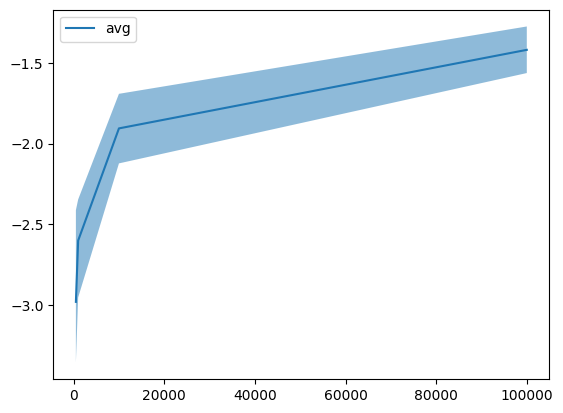

In [3]:
def plot_graph_for_test(env,min_visits=1000):
    mcts = MonteCarloSearchTree(env)
    mins={}
    maxs={}
    avgs={}
    budget=[500,1000,10000,100000]
    probs_pi_dict={}
    # time_slots=[1,5,10,50,100]
    for b in budget:
        min_value = float('inf')
        max_value = float('-inf')
        avg_value = 0
        avg_iteration = 0
        avg_pi=None
        for i in tqdm(range(5)):
            env.reset()
            mcts.root = Node((0,0))
            probs_pi,optimal_value = mcts.get_best_action(b,min_visits=min_visits)
            optimal_action = np.argmax(probs_pi)
            print(f'budget: {b}, optimal_value: {optimal_value}, optimal_action: {optimal_action}')
            min_value = min(min_value, optimal_value)
            max_value = max(max_value, optimal_value)
            avg_value += optimal_value
            if avg_pi is None:
                avg_pi = probs_pi
            else:
                avg_pi += probs_pi
        avg_pi /= 5
        probs_pi_dict[b] = avg_pi/5
        avg_value /= 5

        mins[b] = min_value
        maxs[b] = max_value
        avgs[b] = avg_value
    
    return mins,maxs,avgs,budget


cat_dynamics = catVsMonsters()
# cat_dynamics.current_state = (0,4)
mins_cat,maxs_cat, avgs_cat, iterations_cat = plot_graph_for_test(cat_dynamics,min_visits=1)

import matplotlib.pyplot as plt
# plot with time slots
#  and range  in lighter blue and avg in darker blue
x_values = [500,1000,10000,100000]
y_values =list(avgs_cat.values())
plt.plot(x_values,y_values,label='avg')
plt.fill_between(x_values,list(mins_cat.values()),list(maxs_cat.values()),alpha=0.5)
plt.legend()
# plt.xscale('log')
plt.show()


In [4]:
from tqdm import tqdm

env_cat = catVsMonsters()
mcts_cat = MonteCarloSearchTree(env_cat)
probs_pi_cat={}
pi_cat={}
pi_cat_second={}
for k in tqdm(range(25),desc='outer loop'):
    i = k // 5
    j = k % 5
    action_count = [0,0,0,0]
    for p in tqdm(range(10),desc='inner loop'):
        if (i,j) not in env_cat.furniture and (i,j) != env_cat.goal:
            env_cat.current_state = (i,j)
            mcts_cat.root = Node((i,j))
            probs_pi_cat[(i,j)],optimal_value= mcts_cat.get_best_action(10000,min_visits=2000)
            optimal_action = np.argmax(probs_pi_cat[(i,j)])
            action_count[optimal_action] += 1
    if (i,j) not in env_cat.furniture and (i,j) != env_cat.goal:
        pi_cat[(i,j)] = action_count.index(max(action_count))
        print()
        print(f'state: {(i,j)}, action_count: {action_count}, pi_cat[(i,j)]: {pi_cat[(i,j)]}')
        print(f'--------------------------------')


outer loop:   4%|▍         | 1/25 [01:25<34:19, 85.81s/it]


state: (0, 0), action_count: [1, 5, 0, 4], pi_cat[(i,j)]: 1
--------------------------------


outer loop:   8%|▊         | 2/25 [02:57<34:08, 89.07s/it]


state: (0, 1), action_count: [3, 3, 0, 4], pi_cat[(i,j)]: 3
--------------------------------


outer loop:  12%|█▏        | 3/25 [04:17<31:12, 85.12s/it]


state: (0, 2), action_count: [1, 3, 5, 1], pi_cat[(i,j)]: 2
--------------------------------


outer loop:  16%|█▌        | 4/25 [05:24<27:19, 78.07s/it]


state: (0, 3), action_count: [2, 3, 2, 3], pi_cat[(i,j)]: 1
--------------------------------


outer loop:  20%|██        | 5/25 [06:17<23:01, 69.05s/it]


state: (0, 4), action_count: [2, 5, 3, 0], pi_cat[(i,j)]: 1
--------------------------------


outer loop:  24%|██▍       | 6/25 [07:43<23:39, 74.73s/it]


state: (1, 0), action_count: [3, 3, 2, 2], pi_cat[(i,j)]: 0
--------------------------------


outer loop:  28%|██▊       | 7/25 [09:54<27:56, 93.11s/it]


state: (1, 1), action_count: [4, 2, 2, 2], pi_cat[(i,j)]: 0
--------------------------------


outer loop:  32%|███▏      | 8/25 [11:58<29:08, 102.86s/it]


state: (1, 2), action_count: [2, 4, 1, 3], pi_cat[(i,j)]: 1
--------------------------------


outer loop:  36%|███▌      | 9/25 [13:44<27:40, 103.80s/it]


state: (1, 3), action_count: [3, 0, 5, 2], pi_cat[(i,j)]: 2
--------------------------------


outer loop:  40%|████      | 10/25 [14:38<22:09, 88.62s/it]


state: (1, 4), action_count: [2, 5, 0, 3], pi_cat[(i,j)]: 1
--------------------------------


outer loop:  44%|████▍     | 11/25 [16:45<23:22, 100.15s/it]


state: (2, 0), action_count: [1, 6, 3, 0], pi_cat[(i,j)]: 1
--------------------------------


outer loop:  60%|██████    | 15/25 [17:21<07:01, 42.17s/it] 


state: (2, 4), action_count: [1, 8, 1, 0], pi_cat[(i,j)]: 1
--------------------------------


outer loop:  64%|██████▍   | 16/25 [19:29<08:42, 58.10s/it]


state: (3, 0), action_count: [3, 3, 2, 2], pi_cat[(i,j)]: 0
--------------------------------


outer loop:  68%|██████▊   | 17/25 [21:17<09:08, 68.61s/it]


state: (3, 1), action_count: [1, 4, 5, 0], pi_cat[(i,j)]: 2
--------------------------------


outer loop:  76%|███████▌  | 19/25 [21:37<04:39, 46.65s/it]


state: (3, 3), action_count: [7, 3, 0, 0], pi_cat[(i,j)]: 0
--------------------------------


outer loop:  80%|████████  | 20/25 [21:50<03:17, 39.50s/it]


state: (3, 4), action_count: [0, 3, 5, 2], pi_cat[(i,j)]: 2
--------------------------------


outer loop:  84%|████████▍ | 21/25 [22:55<03:02, 45.54s/it]


state: (4, 0), action_count: [6, 2, 0, 2], pi_cat[(i,j)]: 0
--------------------------------


outer loop:  88%|████████▊ | 22/25 [23:49<02:22, 47.65s/it]


state: (4, 1), action_count: [1, 3, 3, 3], pi_cat[(i,j)]: 1
--------------------------------


outer loop:  92%|█████████▏| 23/25 [24:09<01:20, 40.25s/it]


state: (4, 2), action_count: [2, 0, 1, 7], pi_cat[(i,j)]: 3
--------------------------------


outer loop:  96%|█████████▌| 24/25 [24:20<00:32, 32.43s/it]


state: (4, 3), action_count: [8, 1, 0, 1], pi_cat[(i,j)]: 0
--------------------------------


outer loop: 100%|██████████| 25/25 [24:20<00:00, 58.43s/it]


In [5]:
def print_policy(policy):
    for i in range(5):
        for j in range(5):
            state = (i, j)
            if state == env_cat.goal:
                print("G", end=" ")
                continue
            elif state in env_cat.furniture:
                print("F", end=" ")
                continue
            action = policy[state]
            if action == 0:
                print("↑", end=" ")
            elif action == 1:
                print("↓", end=" ")
            elif action == 2:
                print("←", end=" ")
            elif action == 3:
                print("→", end=" ")
            else:
                print(" ", end=" ")
        print()

print_policy(pi_cat)
# print_policy(pi_cat_second)

↓ → ← ↓ ↓ 
↑ ↑ ↓ ← ↓ 
↓ F F F ↓ 
↑ ← F ↑ ← 
↑ ↓ → ↑ G 


 20%|██        | 1/5 [00:00<00:02,  1.54it/s]

budget: 500, optimal_value: -0.36437232757777693, optimal_action: 1


 40%|████      | 2/5 [00:01<00:01,  1.53it/s]

budget: 500, optimal_value: -0.5393953826083325, optimal_action: 3


 60%|██████    | 3/5 [00:01<00:01,  1.49it/s]

budget: 500, optimal_value: -0.4406885403125403, optimal_action: 3


 80%|████████  | 4/5 [00:02<00:00,  1.41it/s]

budget: 500, optimal_value: -0.4180063850625115, optimal_action: 3


100%|██████████| 5/5 [00:04<00:00,  1.25it/s]


budget: 500, optimal_value: -0.2737816736645009, optimal_action: 3


 20%|██        | 1/5 [00:01<00:06,  1.66s/it]

budget: 1000, optimal_value: -0.4987663434210376, optimal_action: 0


 40%|████      | 2/5 [00:03<00:04,  1.62s/it]

budget: 1000, optimal_value: -0.525005871684427, optimal_action: 3


 60%|██████    | 3/5 [00:04<00:03,  1.65s/it]

budget: 1000, optimal_value: -0.6221981896063989, optimal_action: 0


 80%|████████  | 4/5 [00:06<00:01,  1.52s/it]

budget: 1000, optimal_value: -0.3455706460538166, optimal_action: 3


100%|██████████| 5/5 [00:08<00:00,  1.63s/it]


budget: 1000, optimal_value: -0.5244425524917334, optimal_action: 3


 20%|██        | 1/5 [00:13<00:53, 13.48s/it]

budget: 10000, optimal_value: -0.31851325879795506, optimal_action: 3


 40%|████      | 2/5 [00:32<00:50, 16.70s/it]

budget: 10000, optimal_value: -0.3200996721519084, optimal_action: 3


 60%|██████    | 3/5 [00:48<00:32, 16.47s/it]

budget: 10000, optimal_value: -0.464997620408898, optimal_action: 3


 80%|████████  | 4/5 [01:05<00:16, 16.64s/it]

budget: 10000, optimal_value: -0.39442473459843225, optimal_action: 3


100%|██████████| 5/5 [01:22<00:00, 16.40s/it]


budget: 10000, optimal_value: -0.38427035859324016, optimal_action: 3


 20%|██        | 1/5 [02:20<09:23, 140.85s/it]

budget: 100000, optimal_value: -0.3486845599774954, optimal_action: 3


 40%|████      | 2/5 [04:31<06:44, 134.74s/it]

budget: 100000, optimal_value: -0.3042684005985209, optimal_action: 3


 60%|██████    | 3/5 [06:30<04:15, 127.68s/it]

budget: 100000, optimal_value: -0.3670844347133257, optimal_action: 3


 80%|████████  | 4/5 [08:30<02:04, 124.71s/it]

budget: 100000, optimal_value: -0.35395094484478234, optimal_action: 3


100%|██████████| 5/5 [10:35<00:00, 127.10s/it]

budget: 100000, optimal_value: -0.3728466870579714, optimal_action: 3


ValueError: x and y must have same first dimension, but have shapes (7,) and (4,)

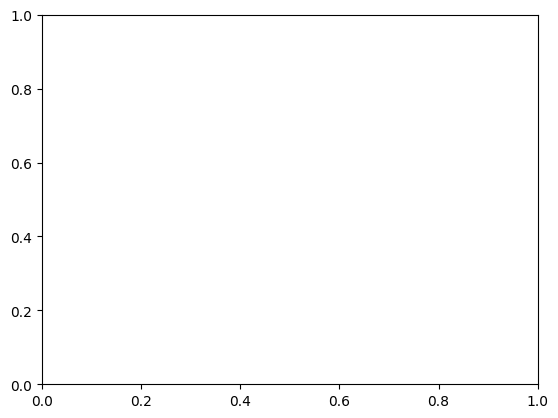

In [7]:
import matplotlib.pyplot as plt
# plot with time slots
#  and range  in lighter blue and avg in darker blue
x_values = [10,50,100,500,1000,10000,100000]
grid_world = GridWorld()



{500: -0.40724886184513237, 1000: -0.5031967206514827, 10000: -0.37646112891008676, 100000: -0.34936700543841914}


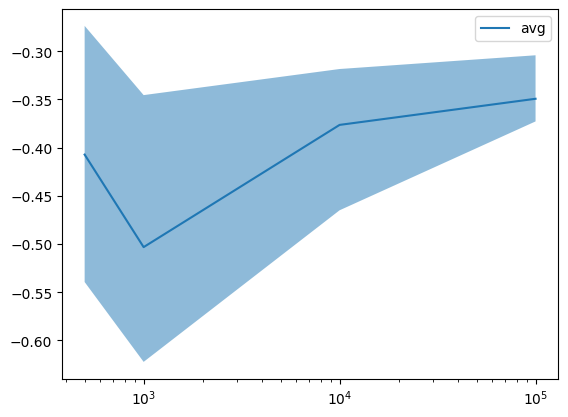

In [12]:
# mins_grid,maxs_grid, avgs_grid, budget_grid = plot_graph_for_test(grid_world)
print(avgs_grid)
y_values =list(avgs_grid.values())
x_values = [500,1000,10000,100000]
plt.plot(x_values,y_values,label='avg')
plt.fill_between(x_values,list(mins_grid.values()),list(maxs_grid.values()),alpha=0.5)
plt.legend()
plt.xscale('log')
plt.show()

In [14]:
from tqdm import tqdm
env_grid = GridWorld()
mcts_grid = MonteCarloSearchTree(env_grid)
probs_pi_grid={}
pi_grid={}
for k in tqdm(range(25),desc='outer loop'):
    i = k // 5
    j = k % 5
    action_count = [0,0,0,0]
    for p in tqdm(range(10),desc='inner loop'):
        if (i,j) not in env_grid.obstacles and (i,j) != env_grid.goal:
            env_grid.current_state = (i,j)
            mcts_grid.root = Node((i,j))
            probs_pi_grid[(i,j)],optimal_value = mcts_grid.get_best_action(10000,min_visits=2000)
            optimal_action = np.argmax(probs_pi_grid[(i,j)])
            action_count[optimal_action] += 1
    if (i,j) not in env_grid.obstacles and (i,j) != env_grid.goal:
        pi_grid[(i,j)] = action_count.index(max(action_count))
        print()
        print(f'state: {(i,j)}, action_count: {action_count}, pi[(i,j)]: {pi_grid[(i,j)]}')
        print(f'--------------------------------')

outer loop:   4%|▍         | 1/25 [02:40<1:04:07, 160.32s/it]


state: (0, 0), action_count: [1, 0, 0, 9], pi[(i,j)]: 3
--------------------------------


outer loop:   8%|▊         | 2/25 [05:09<58:59, 153.91s/it]  


state: (0, 1), action_count: [0, 0, 0, 10], pi[(i,j)]: 3
--------------------------------


outer loop:  12%|█▏        | 3/25 [07:33<54:48, 149.47s/it]


state: (0, 2), action_count: [0, 0, 0, 10], pi[(i,j)]: 3
--------------------------------


outer loop:  16%|█▌        | 4/25 [09:43<49:33, 141.61s/it]


state: (0, 3), action_count: [1, 0, 0, 9], pi[(i,j)]: 3
--------------------------------


outer loop:  20%|██        | 5/25 [12:14<48:21, 145.05s/it]


state: (0, 4), action_count: [4, 5, 1, 0], pi[(i,j)]: 1
--------------------------------


outer loop:  24%|██▍       | 6/25 [13:35<39:00, 123.19s/it]


state: (1, 0), action_count: [6, 0, 1, 3], pi[(i,j)]: 0
--------------------------------


outer loop:  28%|██▊       | 7/25 [14:44<31:38, 105.49s/it]


state: (1, 1), action_count: [0, 0, 0, 10], pi[(i,j)]: 3
--------------------------------


outer loop:  32%|███▏      | 8/25 [15:49<26:16, 92.73s/it] 


state: (1, 2), action_count: [0, 0, 0, 10], pi[(i,j)]: 3
--------------------------------


outer loop:  36%|███▌      | 9/25 [16:48<21:52, 82.04s/it]


state: (1, 3), action_count: [0, 3, 0, 7], pi[(i,j)]: 3
--------------------------------


outer loop:  40%|████      | 10/25 [17:43<18:24, 73.65s/it]


state: (1, 4), action_count: [3, 3, 0, 4], pi[(i,j)]: 3
--------------------------------


outer loop:  44%|████▍     | 11/25 [19:03<17:39, 75.67s/it]


state: (2, 0), action_count: [9, 0, 0, 1], pi[(i,j)]: 0
--------------------------------


outer loop:  48%|████▊     | 12/25 [20:30<17:07, 79.07s/it]


state: (2, 1), action_count: [7, 0, 2, 1], pi[(i,j)]: 0
--------------------------------


outer loop:  56%|█████▌    | 14/25 [21:22<09:58, 54.45s/it]


state: (2, 3), action_count: [1, 0, 4, 5], pi[(i,j)]: 3
--------------------------------


outer loop:  60%|██████    | 15/25 [22:13<08:54, 53.47s/it]


state: (2, 4), action_count: [1, 2, 1, 6], pi[(i,j)]: 3
--------------------------------


outer loop:  64%|██████▍   | 16/25 [23:30<08:58, 59.85s/it]


state: (3, 0), action_count: [5, 1, 2, 2], pi[(i,j)]: 0
--------------------------------


outer loop:  68%|██████▊   | 17/25 [24:48<08:37, 64.66s/it]


state: (3, 1), action_count: [8, 0, 1, 1], pi[(i,j)]: 0
--------------------------------


outer loop:  76%|███████▌  | 19/25 [25:25<04:27, 44.54s/it]


state: (3, 3), action_count: [6, 0, 0, 4], pi[(i,j)]: 0
--------------------------------


outer loop:  80%|████████  | 20/25 [25:53<03:22, 40.57s/it]


state: (3, 4), action_count: [7, 0, 1, 2], pi[(i,j)]: 0
--------------------------------


outer loop:  84%|████████▍ | 21/25 [27:09<03:18, 49.62s/it]


state: (4, 0), action_count: [5, 2, 0, 3], pi[(i,j)]: 0
--------------------------------


outer loop:  88%|████████▊ | 22/25 [28:25<02:49, 56.45s/it]


state: (4, 1), action_count: [5, 1, 3, 1], pi[(i,j)]: 0
--------------------------------


outer loop:  92%|█████████▏| 23/25 [29:10<01:46, 53.48s/it]


state: (4, 2), action_count: [0, 0, 4, 6], pi[(i,j)]: 3
--------------------------------


outer loop:  96%|█████████▌| 24/25 [29:31<00:44, 44.25s/it]


state: (4, 3), action_count: [6, 0, 0, 4], pi[(i,j)]: 0
--------------------------------


outer loop: 100%|██████████| 25/25 [29:31<00:00, 70.87s/it]


In [17]:
def print_policy_grid(policy):
    for i in range(5):
        for j in range(5):
            state = (i, j)
            if state == env_grid.goal:
                print("G", end=" ")
                continue
            elif state in env_grid.obstacles:
                print("O", end=" ")
                continue
            action = policy[state]
            if action == 0:
                print("↑", end=" ")
            elif action == 1:
                print("↓", end=" ")
            elif action == 2:
                print("←", end=" ")
            elif action == 3:
                print("→", end=" ")
            else:
                print(" ", end=" ")
        print()

print_policy_grid(pi_grid)

→ → → → ↓ 
↑ → → → → 
↑ ↑ O → → 
↑ ↑ O ↑ ↑ 
↑ ↑ → ↑ G 


In [26]:
for i in range(5):
    for j in range(3,5):
        action_count = [0,0,0,0]
        for p in tqdm(range(10),desc='inner loop'):
            if (i,j) not in env_grid.obstacles and (i,j) != env_grid.goal:
                env_grid.current_state = (i,j)
                mcts_grid.root = Node((i,j))
                probs_pi_grid[(i,j)],optimal_value = mcts_grid.get_best_action(1000,min_visits=2500)
                probs_pi_grid[(i,j)],optimal_value = mcts_grid.get_best_action(1000,min_visits=2500)
                probs_pi_grid[(i,j)],optimal_value = mcts_grid.get_best_action(1000,min_visits=2500)
                probs_pi_grid[(i,j)],optimal_value = mcts_grid.get_best_action(1000,min_visits=2500)
                optimal_action = np.argmax(probs_pi_grid[(i,j)])
                action_count[optimal_action] += 1
        if (i,j) not in env_grid.obstacles and (i,j) != env_grid.goal:
            pi_grid[(i,j)] = action_count.index(max(action_count))
            print()
            print(f'state: {(i,j)}, action_count: {action_count}, pi[(i,j)]: {pi_grid[(i,j)]}')
            print(f'--------------------------------')


inner loop: 100%|██████████| 10/10 [00:31<00:00,  3.15s/it]



state: (0, 3), action_count: [0, 1, 0, 9], pi[(i,j)]: 3
--------------------------------


inner loop: 100%|██████████| 10/10 [00:32<00:00,  3.26s/it]



state: (0, 4), action_count: [4, 6, 0, 0], pi[(i,j)]: 1
--------------------------------


inner loop: 100%|██████████| 10/10 [00:33<00:00,  3.38s/it]



state: (1, 3), action_count: [1, 5, 0, 4], pi[(i,j)]: 1
--------------------------------


inner loop: 100%|██████████| 10/10 [00:32<00:00,  3.25s/it]



state: (1, 4), action_count: [1, 6, 0, 3], pi[(i,j)]: 1
--------------------------------


inner loop: 100%|██████████| 10/10 [00:25<00:00,  2.56s/it]



state: (2, 3), action_count: [0, 2, 3, 5], pi[(i,j)]: 3
--------------------------------


inner loop: 100%|██████████| 10/10 [00:24<00:00,  2.45s/it]



state: (2, 4), action_count: [2, 3, 1, 4], pi[(i,j)]: 3
--------------------------------


inner loop: 100%|██████████| 10/10 [00:19<00:00,  1.96s/it]



state: (3, 3), action_count: [3, 0, 2, 5], pi[(i,j)]: 3
--------------------------------


inner loop: 100%|██████████| 10/10 [00:13<00:00,  1.40s/it]



state: (3, 4), action_count: [7, 0, 0, 3], pi[(i,j)]: 0
--------------------------------


inner loop: 100%|██████████| 10/10 [00:08<00:00,  1.21it/s]



state: (4, 3), action_count: [2, 0, 0, 8], pi[(i,j)]: 3
--------------------------------


inner loop: 100%|██████████| 10/10 [00:00<00:00, 303935.07it/s]


In [25]:
print_policy_grid(pi_grid)

→ → → → ↓ 
↑ → → → ↓ 
↑ ↑ O → ↑ 
↑ ↑ O ↑ ↑ 
↑ ↑ → → G 


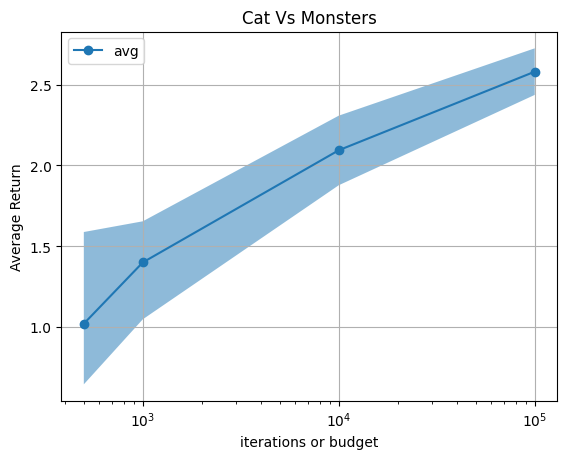

In [68]:
import matplotlib.pyplot as plt
# plot with time slots
#  and range  in lighter blue and avg in darker blue

x_values = [500,1000,10000,100000]
y_values =list(avgs_cat.values())
y_values = [x+4 for x in y_values]
plt.plot(x_values,y_values,label='avg', marker='o')
plt.xlabel('iterations or budget')
plt.ylabel('Average Return')
plt.title('Cat Vs Monsters')
min_values_cat = [x+4 for x in list(mins_cat.values())]
max_values_cat = [x+4 for x in list(maxs_cat.values())]  
plt.fill_between(x_values,min_values_cat,max_values_cat,alpha=0.5)
plt.legend()
plt.xscale('log')
plt.grid(True)
plt.show()

{500: -0.40724886184513237, 1000: -0.5031967206514827, 10000: -0.37646112891008676, 100000: -0.34936700543841914}


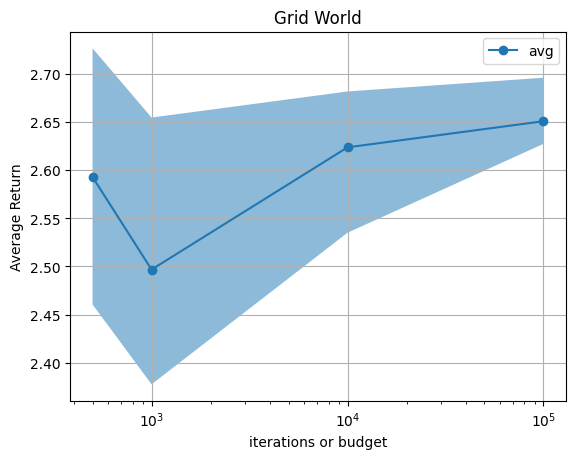

In [69]:
print(avgs_grid)
y_values =list(avgs_grid.values())
x_values = [500,1000,10000,100000]
y_values = [x+3 for x in y_values]
plt.plot(x_values,y_values,label='avg', marker='o')
plt.xlabel('iterations or budget')
plt.ylabel('Average Return')
plt.title('Grid World')
min_values_grid = [x+3 for x in list(mins_grid.values())]
max_values_grid = [x+3 for x in list(maxs_grid.values())]  
plt.fill_between(x_values,min_values_grid,max_values_grid,alpha=0.5)
plt.legend()
plt.xscale('log')
plt.grid(True)
plt.show()

In [ ]:
def get_greedy_policy(probs_pi):
    policy = {}
    for state in probs_pi:
        if state not in env.obstacles and state != env.goal:
            policy[state] = np.argmax(probs_pi[state])
    return policy
print(probs_pi_grid)
print_policy_grid(get_greedy_policy(probs_pi_grid))



In [34]:
import pickle
# save the policy in a file
with open('policy_grid.pkl', 'wb') as f:
    pickle.dump(pi_grid, f)
with open('policy_cat.pkl', 'wb') as f:
    pickle.dump(pi_cat, f)
# save the plot elements in a file
with open('plot_elements.pkl', 'wb') as f:
    pickle.dump((mins_grid,maxs_grid,avgs_grid,budget_grid), f)
with open('plot_elements_cat.pkl', 'wb') as f:
    pickle.dump((mins_cat,maxs_cat,avgs_cat,iterations_cat), f)


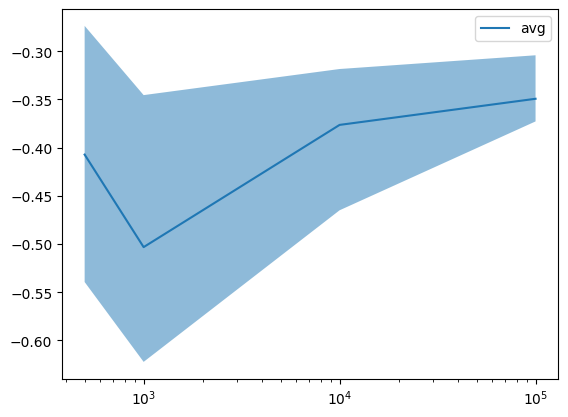

In [35]:
#read the pickles and plot the graph
with open('plot_elements.pkl', 'rb') as f:
    mins_grid_p,maxs_grid_p,avgs_grid_p,budget_grid_p = pickle.load(f)
with open('plot_elements_cat.pkl', 'rb') as f:
    mins_cat_p,maxs_cat_p,avgs_cat_p,iterations_cat_p = pickle.load(f)

x_values = [500,1000,10000,100000]
y_values =list(avgs_grid_p.values())
plt.plot(x_values,y_values,label='avg')
plt.fill_between(x_values,list(mins_grid_p.values()),list(maxs_grid_p.values()),alpha=0.5)
plt.legend()
plt.xscale('log')
plt.grid(True)
plt.show()


In [44]:
# check for different depth limits

def plot_graph_for_test_depth(env,min_visits=1000):
    mcts = MonteCarloSearchTree(env)
    mins={}
    maxs={}
    avgs={}
    depths=[5,10,20,40,100,200]
    probs_pi_dict={}
    b=10000
    # time_slots=[1,5,10,50,100]
    for depth in depths:
        min_value = float('inf')
        max_value = float('-inf')
        avg_value = 0
        avg_iteration = 0
        avg_pi=None
        for i in tqdm(range(5)):
            env.reset()
            mcts.root = Node((0,0))
            probs_pi,optimal_value = mcts.get_best_action(b,min_visits=min_visits)
            optimal_action = np.argmax(probs_pi)
            print(f'budget: {b}, optimal_value: {optimal_value}, optimal_action: {optimal_action}')
            min_value = min(min_value, optimal_value)
            max_value = max(max_value, optimal_value)
            avg_value += optimal_value
            if avg_pi is None:
                avg_pi = probs_pi
            else:
                avg_pi += probs_pi
        avg_pi /= 5
        probs_pi_dict[depth] = avg_pi/5
        avg_value /= 5

        mins[depth] = min_value
        maxs[depth] = max_value
        avgs[depth] = avg_value
    
    return mins,maxs,avgs


mins_grid_d,maxs_grid_d, avgs_grid_d = plot_graph_for_test_depth(env_grid)
mins_cat_d,maxs_cat_d, avgs_cat_d = plot_graph_for_test_depth(cat_dynamics)


 20%|██        | 1/5 [00:11<00:45, 11.36s/it]

budget: 10000, optimal_value: -0.29116383648492206, optimal_action: 3


 40%|████      | 2/5 [00:21<00:32, 10.86s/it]

budget: 10000, optimal_value: -0.41753811436655736, optimal_action: 3


 60%|██████    | 3/5 [00:31<00:20, 10.45s/it]

budget: 10000, optimal_value: -0.48910219574712216, optimal_action: 3


 80%|████████  | 4/5 [00:42<00:10, 10.62s/it]

budget: 10000, optimal_value: -0.4203617279075841, optimal_action: 3


100%|██████████| 5/5 [00:53<00:00, 10.77s/it]


budget: 10000, optimal_value: -0.3740088678615898, optimal_action: 3


 20%|██        | 1/5 [00:09<00:36,  9.13s/it]

budget: 10000, optimal_value: -0.3476285039425948, optimal_action: 3


 40%|████      | 2/5 [00:19<00:29,  9.81s/it]

budget: 10000, optimal_value: -0.37449683374706716, optimal_action: 3


 60%|██████    | 3/5 [00:29<00:19,  9.95s/it]

budget: 10000, optimal_value: -0.4600258142310859, optimal_action: 3


 80%|████████  | 4/5 [00:40<00:10, 10.44s/it]

budget: 10000, optimal_value: -0.33857680209373103, optimal_action: 3


100%|██████████| 5/5 [00:51<00:00, 10.30s/it]


budget: 10000, optimal_value: -0.48426278448233434, optimal_action: 3


 20%|██        | 1/5 [00:11<00:45, 11.37s/it]

budget: 10000, optimal_value: -0.3876060871556662, optimal_action: 3


 40%|████      | 2/5 [00:22<00:34, 11.33s/it]

budget: 10000, optimal_value: -0.35076641597081354, optimal_action: 3


 60%|██████    | 3/5 [00:35<00:23, 11.96s/it]

budget: 10000, optimal_value: -0.37479382040897025, optimal_action: 3


 80%|████████  | 4/5 [00:47<00:12, 12.13s/it]

budget: 10000, optimal_value: -0.41176129234352093, optimal_action: 3


100%|██████████| 5/5 [01:01<00:00, 12.31s/it]


budget: 10000, optimal_value: -0.40621787688915756, optimal_action: 3


 20%|██        | 1/5 [00:11<00:47, 11.86s/it]

budget: 10000, optimal_value: -0.5194300114023852, optimal_action: 0


 40%|████      | 2/5 [00:23<00:35, 11.90s/it]

budget: 10000, optimal_value: -0.4421521483087278, optimal_action: 3


 60%|██████    | 3/5 [00:35<00:23, 11.98s/it]

budget: 10000, optimal_value: -0.43505414587669133, optimal_action: 1


 80%|████████  | 4/5 [00:47<00:12, 12.04s/it]

budget: 10000, optimal_value: -0.3818569398466963, optimal_action: 3


100%|██████████| 5/5 [00:59<00:00, 11.92s/it]


budget: 10000, optimal_value: -0.35891067051918757, optimal_action: 3


 20%|██        | 1/5 [00:11<00:44, 11.06s/it]

budget: 10000, optimal_value: -0.39842687371891683, optimal_action: 3


 40%|████      | 2/5 [00:23<00:36, 12.01s/it]

budget: 10000, optimal_value: -0.4725229893387079, optimal_action: 3


 60%|██████    | 3/5 [00:34<00:23, 11.62s/it]

budget: 10000, optimal_value: -0.44827310502112977, optimal_action: 3


 80%|████████  | 4/5 [00:48<00:12, 12.37s/it]

budget: 10000, optimal_value: -0.4172561103879868, optimal_action: 3


100%|██████████| 5/5 [01:01<00:00, 12.36s/it]


budget: 10000, optimal_value: -0.470298213633141, optimal_action: 3


 20%|██        | 1/5 [00:10<00:41, 10.45s/it]

budget: 10000, optimal_value: -0.3784623305980432, optimal_action: 3


 40%|████      | 2/5 [00:22<00:34, 11.53s/it]

budget: 10000, optimal_value: -0.4274906576504735, optimal_action: 3


 60%|██████    | 3/5 [00:33<00:22, 11.31s/it]

budget: 10000, optimal_value: -0.3606334462114262, optimal_action: 3


 80%|████████  | 4/5 [00:50<00:13, 13.39s/it]

budget: 10000, optimal_value: -0.3545405835467287, optimal_action: 3


100%|██████████| 5/5 [01:05<00:00, 13.13s/it]


budget: 10000, optimal_value: -0.4333238752708287, optimal_action: 0


 20%|██        | 1/5 [00:14<00:57, 14.44s/it]

budget: 10000, optimal_value: -1.9274855861460953, optimal_action: 1


 40%|████      | 2/5 [00:27<00:41, 13.79s/it]

budget: 10000, optimal_value: -1.9346655987359827, optimal_action: 3


 60%|██████    | 3/5 [00:39<00:25, 12.85s/it]

budget: 10000, optimal_value: -1.8347122905669078, optimal_action: 1


 80%|████████  | 4/5 [00:54<00:13, 13.57s/it]

budget: 10000, optimal_value: -1.9205486092466335, optimal_action: 3


100%|██████████| 5/5 [01:05<00:00, 13.18s/it]


budget: 10000, optimal_value: -2.1362289691691174, optimal_action: 1


 20%|██        | 1/5 [00:13<00:53, 13.32s/it]

budget: 10000, optimal_value: -2.0982050359411804, optimal_action: 1


 40%|████      | 2/5 [00:24<00:36, 12.21s/it]

budget: 10000, optimal_value: -2.056661592739977, optimal_action: 3


 60%|██████    | 3/5 [00:35<00:23, 11.63s/it]

budget: 10000, optimal_value: -1.9735501809595295, optimal_action: 0


 80%|████████  | 4/5 [00:47<00:11, 11.88s/it]

budget: 10000, optimal_value: -1.879026101561785, optimal_action: 3


100%|██████████| 5/5 [00:59<00:00, 11.83s/it]


budget: 10000, optimal_value: -1.7673204104042768, optimal_action: 3


 20%|██        | 1/5 [00:10<00:41, 10.50s/it]

budget: 10000, optimal_value: -1.9134329128966137, optimal_action: 0


 40%|████      | 2/5 [00:22<00:34, 11.35s/it]

budget: 10000, optimal_value: -2.0606497829051156, optimal_action: 0


 60%|██████    | 3/5 [00:34<00:22, 11.44s/it]

budget: 10000, optimal_value: -2.0077617058729373, optimal_action: 3


 80%|████████  | 4/5 [00:45<00:11, 11.36s/it]

budget: 10000, optimal_value: -1.7699283574909033, optimal_action: 0


100%|██████████| 5/5 [00:56<00:00, 11.40s/it]


budget: 10000, optimal_value: -1.9739220593425202, optimal_action: 0


 20%|██        | 1/5 [00:11<00:44, 11.17s/it]

budget: 10000, optimal_value: -1.9859947785701593, optimal_action: 0


 40%|████      | 2/5 [00:23<00:35, 11.71s/it]

budget: 10000, optimal_value: -1.9812645262047262, optimal_action: 3


 60%|██████    | 3/5 [00:34<00:22, 11.28s/it]

budget: 10000, optimal_value: -1.779826822896938, optimal_action: 3


 80%|████████  | 4/5 [00:46<00:11, 11.91s/it]

budget: 10000, optimal_value: -1.9498906593084382, optimal_action: 0


100%|██████████| 5/5 [00:57<00:00, 11.49s/it]


budget: 10000, optimal_value: -1.8678965854309169, optimal_action: 3


 20%|██        | 1/5 [00:11<00:45, 11.32s/it]

budget: 10000, optimal_value: -1.6184535252385794, optimal_action: 3


 40%|████      | 2/5 [00:23<00:36, 12.06s/it]

budget: 10000, optimal_value: -2.1310499230555147, optimal_action: 0


 60%|██████    | 3/5 [00:34<00:22, 11.27s/it]

budget: 10000, optimal_value: -2.088300119710407, optimal_action: 0


 80%|████████  | 4/5 [00:46<00:11, 11.82s/it]

budget: 10000, optimal_value: -1.8490494796249763, optimal_action: 0


100%|██████████| 5/5 [00:57<00:00, 11.52s/it]


budget: 10000, optimal_value: -2.034992048181226, optimal_action: 1


 20%|██        | 1/5 [00:10<00:42, 10.74s/it]

budget: 10000, optimal_value: -2.0443100257038216, optimal_action: 3


 40%|████      | 2/5 [00:23<00:35, 11.86s/it]

budget: 10000, optimal_value: -2.054592949553358, optimal_action: 0


 60%|██████    | 3/5 [00:34<00:22, 11.31s/it]

budget: 10000, optimal_value: -1.8950703164856972, optimal_action: 3


 80%|████████  | 4/5 [00:44<00:11, 11.13s/it]

budget: 10000, optimal_value: -1.3855504834116397, optimal_action: 3


100%|██████████| 5/5 [00:58<00:00, 11.63s/it]

budget: 10000, optimal_value: -1.4266840633796043, optimal_action: 3


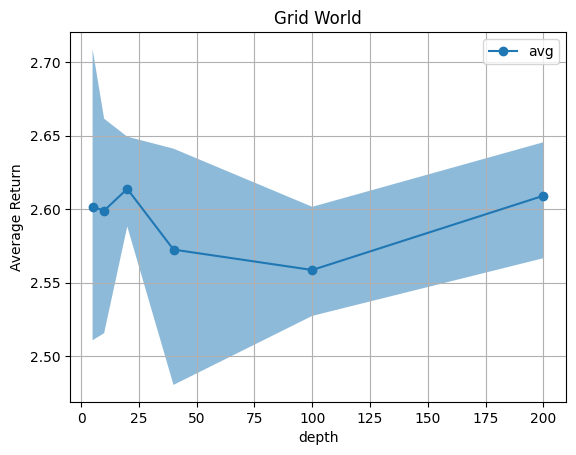

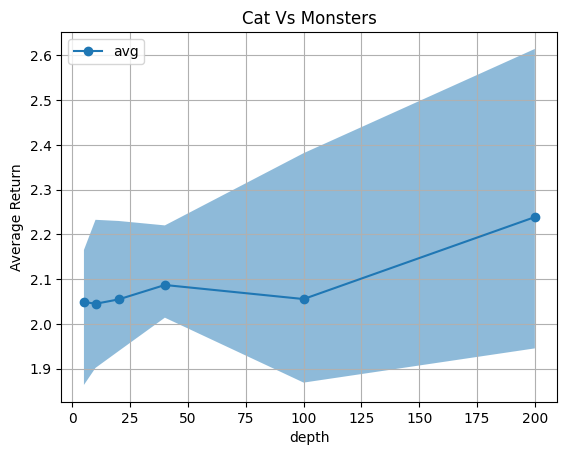

In [70]:
# plot the graph
x_values = [5,10,20,40,100,200]
# print(avgs_grid_d)
y_values = [x+3  for x in list(avgs_grid_d.values())]
plt.plot(x_values,y_values,label='avg', marker='o')
min_values_grid = [x+3 for x in list(mins_grid_d.values())]
max_values_grid = [x+3 for x in list(maxs_grid_d.values())]  
plt.fill_between(x_values,min_values_grid,max_values_grid,alpha=0.5)
plt.legend()
plt.xlabel('depth')
plt.ylabel('Average Return')
plt.title('Grid World')
# plt.xscale('log')
plt.grid(True)
plt.show()

x_values = [5,10,20,40,100,200]
y_values = [x + 4 for x in list(avgs_cat_d.values())]
plt.plot(x_values,y_values,label='avg', marker='o')
min_values_cat = [x+4 for x in list(mins_cat_d.values())]
max_values_cat = [x+4 for x in list(maxs_cat_d.values())]  
plt.fill_between(x_values,min_values_cat,max_values_cat,alpha=0.5)
plt.legend()
plt.xlabel('depth')
plt.ylabel('Average Return')
plt.title('Cat Vs Monsters')
plt.grid(True)
# plt.xscale('log')
plt.show()